In [1]:
import numpy as np
import robosuite as suite

from PIL import Image
from IPython.display import display

In [2]:
suite.ALL_ENVIRONMENTS

dict_keys(['Lift', 'TwoArmLift', 'Stack', 'NutAssembly', 'NutAssemblySingle', 'NutAssemblySquare', 'NutAssemblyRound', 'PickPlace', 'PickPlaceSingle', 'PickPlaceMilk', 'PickPlaceBread', 'PickPlaceCereal', 'PickPlaceCan', 'TwoArmPegInHole'])

In [26]:
env = suite.make(
    env_name="Lift",
    robots="Sawyer",
    has_renderer=False,
    ignore_done=True,
    use_camera_obs=True,
    camera_names=["frontview", "agentview"]
)

obs = env.reset()

Creating offscreen glfw


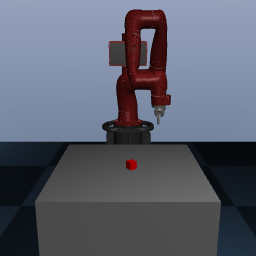

In [32]:
frontview = Image.fromarray(obs['frontview_image'][::-1])
display(frontview)

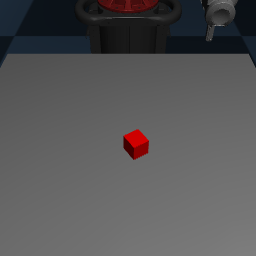

In [33]:
agentview = Image.fromarray(obs['agentview_image'][::-1])
display(agentview)

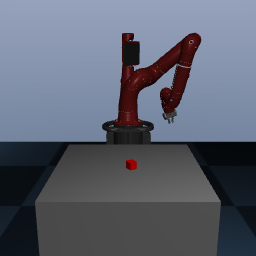

In [35]:
low, high = env.action_spec # get action limits
for i in range(100):
    action = np.random.uniform(low, high) # sample random action
    obs, reward, done, _ = env.step(action)

display(Image.fromarray(obs['frontview_image'][::-1]))

In [6]:
print('number of bodies:', env.sim.model.nbody)
print('number of joints:', env.sim.model.njnt)
print('number of generalized coordinates:', env.sim.model.nq)
print('number of degrees of freedom:', env.sim.model.nv)
print('number of degrees of freedom:', env.sim.model.nu)
print('number of activation states:', env.sim.model.na)

number of bodies: 33
number of joints: 10
number of generalized coordinates: 16
number of degrees of freedom: 15
number of degrees of freedom: 9
number of activation states: 0


In [7]:
print(env.sim.model.body_names)

('world', 'table', 'robot0_base', 'robot0_controller_box', 'robot0_pedestal_feet', 'robot0_torso', 'robot0_pedestal', 'robot0_right_arm_base_link', 'robot0_right_l0', 'robot0_head', 'robot0_screen', 'robot0_head_camera', 'robot0_right_torso_itb', 'robot0_right_l1', 'robot0_right_l2', 'robot0_right_l3', 'robot0_right_l4', 'robot0_right_arm_itb', 'robot0_right_l5', 'robot0_right_hand_camera', 'robot0_right_wrist', 'robot0_right_l6', 'robot0_right_hand', 'gripper0_gripper_base', 'gripper0_gripper', 'gripper0_l_finger', 'gripper0_l_finger_tip', 'gripper0_r_finger', 'gripper0_r_finger_tip', 'robot0_right_l4_2', 'robot0_right_l2_2', 'robot0_right_l1_2', 'cube')


In [8]:
body_id = 1

print(env.sim.model.body_names[body_id])
print(env.sim.data.body_xpos[body_id])
print(env.sim.data.body_xquat[body_id])

body_id = -1

print()
print(env.sim.model.body_names[body_id])
print('Frame origin:\n', env.sim.data.body_xpos[body_id])
print('\nRotation quaternion:\n', env.sim.data.body_xquat[body_id])
print('\nRotation matrix:\n', env.sim.data.body_xmat[body_id].reshape(3,3))

table
[0.  0.  0.4]
[1. 0. 0. 0.]

cube
Frame origin:
 [0.01138731 0.02477892 0.81979157]

Rotation quaternion:
 [-4.37897707e-01  3.58248634e-07  1.30641041e-07  8.99024804e-01]

Rotation matrix:
 [[-6.16491197e-01  7.87361800e-01  5.29733992e-07]
 [-7.87361800e-01 -6.16491197e-01  5.48651583e-07]
 [ 7.58563640e-07 -7.88534383e-08  1.00000000e+00]]


In [19]:
# simple example of coordinate transformations
import robosuite.utils.transform_utils as T

T.quat2mat(T.convert_quat(np.array(env.sim.data.body_xquat[body_id]), to="xyzw"))

array([[-6.16491199e-01,  7.87361860e-01,  5.29734052e-07],
       [-7.87361860e-01, -6.16491199e-01,  5.48651656e-07],
       [ 7.58563715e-07, -7.88534749e-08,  1.00000000e+00]])

In [20]:
env.sim.data.body_xmat[body_id].reshape(3, 3)

array([[-6.16491197e-01,  7.87361800e-01,  5.29733992e-07],
       [-7.87361800e-01, -6.16491197e-01,  5.48651583e-07],
       [ 7.58563640e-07, -7.88534383e-08,  1.00000000e+00]])

In [21]:
env.sim.data.body_xpos[body_id]

array([0.01138731, 0.02477892, 0.81979157])

In [22]:
# get information of all bodies
for i in range(env.sim.model.nbody):
    name = env.sim.model.body_names[i]
    body_id = env.sim.model.body_name2id(name)
    body_xpos = env.sim.data.body_xpos[body_id]
    print(body_id, name, body_xpos)

0 world [0. 0. 0.]
1 table [0.  0.  0.4]
2 robot0_base [-0.56   0.     0.913]
3 robot0_controller_box [-0.56   0.     0.913]
4 robot0_pedestal_feet [-0.56   0.     0.913]
5 robot0_torso [-0.56   0.     0.913]
6 robot0_pedestal [-0.56   0.     0.913]
7 robot0_right_arm_base_link [-0.56   0.     0.913]
8 robot0_right_l0 [-0.56   0.     0.993]
9 robot0_head [-0.56    0.      1.2895]
10 robot0_screen [-0.5301606   0.00310002  1.3945    ]
11 robot0_head_camera [-0.53731937  0.00235629  1.506072  ]
12 robot0_right_torso_itb [-0.61470557 -0.00568336  1.213     ]
13 robot0_right_l1 [-0.48460031  0.05810238  1.23      ]
14 robot0_right_l2 [-0.52204712  0.19747898  1.36812368]
15 robot0_right_l3 [-0.56012725  0.1512974   1.62460207]
16 robot0_right_l4 [-0.48225316  0.03195045  1.51821043]
17 robot0_right_arm_itb [-0.39741525  0.02132469  1.48160958]
18 robot0_right_l5 [-0.33204061  0.07619771  1.29003425]
19 robot0_right_hand_camera [-0.34710415  0.15673272  1.26227072]
20 robot0_right_wrist [-0